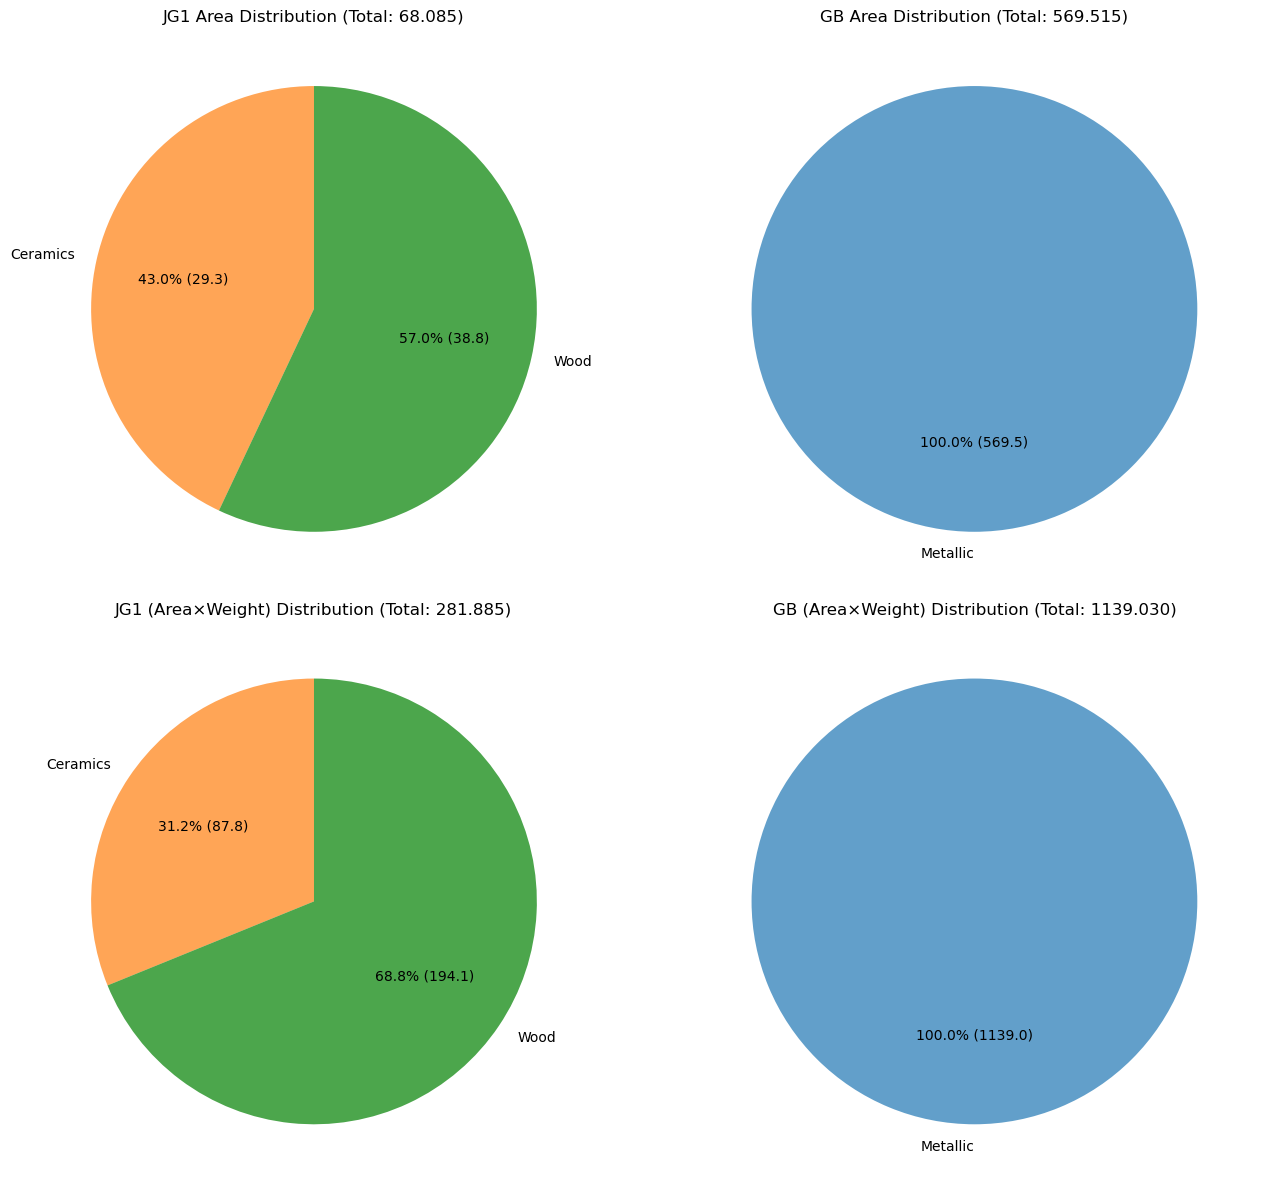

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 建立原始資料
data = {
    "Material": ["Metallic", "Ceramics", "Wood"],
    "JG1_weight": [2, 3, 5],
    "JG1_Area": [0,  29.27, 38.815,],
    "GB_Area": [569.515, 0, 0]
}
df = pd.DataFrame(data)

# ---------------------------
# 上方：原始 Area 圓餅圖
# ---------------------------
# 過濾掉 Area 為 0 的資料
df_jg1_area = df[df["JG1_Area"] > 0]  # Ceramics 與 Wood
df_gb_area = df[df["GB_Area"] > 0]    # Metallic

# 計算總 Area
total_jg1_area = df_jg1_area["JG1_Area"].sum()
total_gb_area = df_gb_area["GB_Area"].sum()

# 自訂 JG1 Area 圖的顏色：對調後順序 ['C1', 'green']
colors_jg1_area = ['C1', 'green']

# ---------------------------
# 下方：Area×Weight 圓餅圖
# ---------------------------
# 計算面積乘上權重的值
df["JG1_product"] = df["JG1_Area"] * df["JG1_weight"]
df["GB_product"] = df["GB_Area"] * df["JG1_weight"]

# 過濾掉乘積為 0 的項目
df_jg1_product = df[df["JG1_product"] > 0]
df_gb_product = df[df["GB_product"] > 0]

# 計算總乘積值
total_jg1_product = df_jg1_product["JG1_product"].sum()
total_gb_product = df_gb_product["GB_product"].sum()

# 自訂 JG1 乘積圖的顏色（與上方相同）
colors_jg1_product = ['C1', 'green']

# ---------------------------
# 定義自訂 autopct 函數：顯示百分比與原始數值
# ---------------------------
def make_autopct(values):
    # 利用 counter 追蹤目前的 index
    counter = [0]
    def my_autopct(pct):
        i = counter[0]
        counter[0] += 1
        return '{p:.1f}% ({v:.1f})'.format(p=pct, v=values[i])
    return my_autopct

# ---------------------------
# 繪製 2x2 圓餅圖
# ---------------------------
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# 上方左：JG1 Area 分布
patches1, texts1, autotexts1 = axs[0, 0].pie(
    df_jg1_area["JG1_Area"],
    labels=df_jg1_area["Material"],
    autopct=make_autopct(df_jg1_area["JG1_Area"].tolist()),
    startangle=90,
    colors=colors_jg1_area,
    wedgeprops={'alpha': 0.7}
)
axs[0, 0].set_title(f"JG1 Area Distribution (Total: {total_jg1_area:.3f})")

# 上方右：GB Area 分布
patches2, texts2, autotexts2 = axs[0, 1].pie(
    df_gb_area["GB_Area"],
    labels=df_gb_area["Material"],
    autopct=make_autopct(df_gb_area["GB_Area"].tolist()),
    startangle=90,
    wedgeprops={'alpha': 0.7}
)
axs[0, 1].set_title(f"GB Area Distribution (Total: {total_gb_area:.3f})")

# 下方左：JG1 (Area×Weight) 分布
patches3, texts3, autotexts3 = axs[1, 0].pie(
    df_jg1_product["JG1_product"],
    labels=df_jg1_product["Material"],
    autopct=make_autopct(df_jg1_product["JG1_product"].tolist()),
    startangle=90,
    colors=colors_jg1_product,
    wedgeprops={'alpha': 0.7}
)
axs[1, 0].set_title(f"JG1 (Area×Weight) Distribution (Total: {total_jg1_product:.3f})")

# 下方右：GB (Area×Weight) 分布
patches4, texts4, autotexts4 = axs[1, 1].pie(
    df_gb_product["GB_product"],
    labels=df_gb_product["Material"],
    autopct=make_autopct(df_gb_product["GB_product"].tolist()),
    startangle=90,
    wedgeprops={'alpha': 0.7}
)
axs[1, 1].set_title(f"GB (Area×Weight) Distribution (Total: {total_gb_product:.3f})")

plt.tight_layout()
plt.show()
